### Step 1:
* Importing the Restraurant Review dataset using pandas library.
* Import dataset with setting delimiter as '\t' as columns are separated as tab space.
* Exploring the data

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
stop = stopwords.words('english')
# import seaborn as sns

In [3]:
# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [4]:
Review = pd.DataFrame(dataset)
Review = Review[Review.columns[0]]

#for i in Review:
    #print(i, end=" ")

In [5]:
# Exploring the dataset
dataset.groupby('Liked').describe()

Review                                    
       count unique                     top freq
Liked                                           
0        500    497  The food was terrible.    2
1        500    499      I love this place.    2

In [6]:
import wordcloud

In [7]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

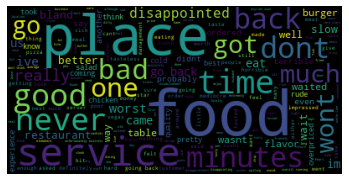

In [8]:
negative = dataset[dataset['Liked'] == 0]
negative = negative['Review']
negative = negative.str.replace('[^\w\s]','')
negative = negative.str.lower()
negative = negative.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
negative_cloud = WordCloud().generate(' '.join(negative))
plt.imshow(negative_cloud)
plt.axis("off")
plt.show()

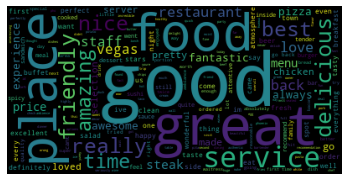

In [9]:
positive = dataset[dataset['Liked'] == 1]
positive = positive['Review']
positive = positive.str.replace('[^\w\s]','')
positive = positive.str.lower()
positive = positive.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
positive_cloud = WordCloud().generate(' '.join(positive))
plt.imshow(positive_cloud)
plt.axis("off")
plt.show()

In [10]:
# Length of the review column
dataset['Length'] = dataset['Review'].apply(len)
dataset

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [11]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [12]:
dataset[dataset['Length'] == 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

#### Data Visualization

<AxesSubplot:ylabel='Frequency'>

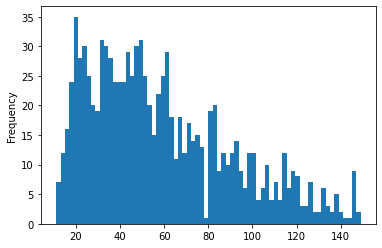

In [13]:
# Plot the length of reviews
dataset['Length'].plot(bins=70, kind='hist')

The most frequent length of reviews is 20 to 80 words.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

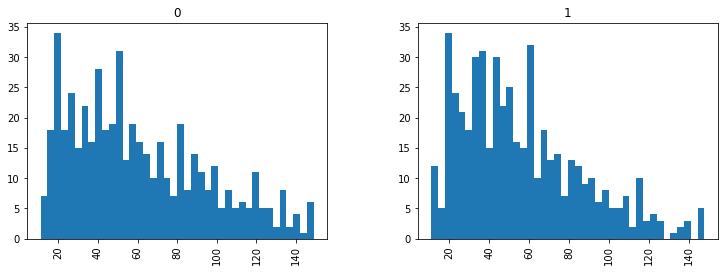

In [14]:
# Plot the length of reviews separetely for likes and dislikes
dataset.hist(column='Length', by='Liked', bins=40,figsize=(12,4))

### Step 2: Text Cleaning or Preprocessing
* Removing the Stopwords, numeric and special charecters
* Normalizing each review using the approach of stemming
* Convert each word into its lower case

In [15]:
# library to clean data
import re

In [16]:
# Natural Language Tool Kit
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siyige/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# to remove stopword
from nltk.corpus import stopwords

In [18]:
# for Stemming propose
from nltk.stem.porter import PorterStemmer

In [19]:
# Initialize empty array
# to append cleam text
corpus = []

In [20]:
# 1000 (reviews) rows to clean
for i in range(0,1000):
    
    # column : "Review", row ith
    review = re.sub('[^a-zA-z]',' ', dataset['Review'][i])
    
    # convert all cases to lower cases
    review = review.lower()
    
    # split to array(default delimiter is " ")
    review = review.split()
    
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
    
    # loop for stemming each word
    # in string array at ith row
    review = [ps.stem(word) for word in review
             if not word in set(stopwords.words('english'))]
    
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)
    
    # append each string to create
    # array of clean text
    corpus.append(review)

### Examples:
Before and after applying above code(reviews => before, corpus => after)

In [21]:
# Examples: Before and after applying above code (reviews => before)
dataset[0:9]

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
8,The fries were great too.,1,25


In [23]:
Review[0:9]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
Name: Review, dtype: object

In [127]:
# Examples: Before and after applying above code (corpus => after)
corpus[0:1000]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

### Step 3:
Tokenization, involves splitting sentences and words from the body of the text

In [25]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/siyige/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
print(sent_tokenize(corpus[149])) 
print(word_tokenize(corpus[149]))

['watch waiter pay lot attent tabl ignor us']
['watch', 'waiter', 'pay', 'lot', 'attent', 'tabl', 'ignor', 'us']


### Step 4: Making the bag of words via sparse matrix
* Take all the different words of reviews in the dataset without repeating of words.
* One column for each word, therefore there are going to be many columns
* Rows are reviews 
* If word is there in row of dataset of reviews, then the count of word will be there in row of bag of words under the column of the word

In [19]:
# Creating the Bag of Words model using CountVectorizer (Convert a collection of text documents to a matrix of token counts)
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

In [125]:
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

In [22]:
# Array mapping from feature integer indices to feature name.
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

In [120]:
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

### Step 5: Splitting Corpus into Training and Test set

In [24]:
# Splitting the dataset into 
# the Training set and Test set 
from sklearn.model_selection import train_test_split

In [25]:
# experiment with "test_size" 
# to get better results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Step 6: Fitting a Predictive Model (Random Forest)
* Since Random fored is ensemble model (made of many trees) from sklearn.ensemble, import RandomForestClassifier class
* With 501 tree or “n_estimators” and criterion as ‘entropy’
* Fit the model via .fit() method with attributes X_train and y_train

In [26]:
# Fitting Random Forest Classification 
# to the Training set 
from sklearn.ensemble import RandomForestClassifier

In [27]:
# n_estimators can be said as number of 
# trees, experiment with n_estimators 
# to get better results  
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=501)

### Step 7: 
Pridicting Final Results via using .predict() method with attribute X_test

In [28]:
# Predicting the Test set results 
y_pred = model.predict(X_test) 
  
y_pred 

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

### Step 8: To know the accuracy, confusion matrix is needed.

In [29]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
  
cm 

array([[131,  21],
       [ 59,  89]])

In [35]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
  
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix:\n",cm) 

# Accruacy with random forest under test size 0.3

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)

print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[131  21]
 [ 59  89]]


Accuracy is  73.33 %
Precision is  0.81
Recall is  0.6


### Multinomial Naive Bayes

In [36]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[119  33]
 [ 34 114]]


Accuracy is  77.67 %
Precision is  0.78
Recall is  0.77


### Bernoulli Naive Bayes

In [34]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[115  37]
 [ 32 116]]


Accuracy is  77.0 %
Precision is  0.76
Recall is  0.78


### Logistic Regression

In [35]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

Confusion Matrix:
 [[125  27]
 [ 43 105]]


Accuracy is  76.67 %
Precision is  0.8
Recall is  0.71


### ---------------------------------------------------------

### TF-IDF

In [36]:
# import the necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# two simple documents containing one sentence each
documentA = dataset.iloc[3,0]
documentB = dataset.iloc[7,0]

In [38]:
documentA

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [39]:
# bag of words
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [40]:
# casting the bag of words to a set, automatically remove any duplicate words
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [41]:
# create a dictionary of words and their occurence for each document in the corpus
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1   

In [42]:
# remove stopwords
from nltk.corpus import stopwords
# stopwords.words('english')

### TF
\begin{equation*}
tf_{i,j} = \frac{n_{i,j}}{ \sum_k n_{i,j}}
\end{equation*}

In [43]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [44]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

### IDF
\begin{equation*}
idf(w)=log{\frac{N}{df_t}}
\end{equation*}

In [45]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [46]:
idfs = computeIDF([numOfWordsA, numOfWordsB])

### TF-IDF
\begin{equation*}
w_{i,j}=tf_{i,j}*log{\frac{N}{df_i}}
\end{equation*}

In [47]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [48]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])
df

,ahead,made,under,May,late,time,like,rubber,warmer.,being,...,Rick,of,Stopped,potatoes,kept,holiday,Steve,and,recommendation,The
0,0.000000,0.000000,0.000000,0.04621,0.04621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.04621,0.000000,0.04621,0.000000,0.000000,0.04621,0.04621,0.0,0.04621,0.000000
1,0.031507,0.031507,0.031507,0.00000,0.00000,0.031507,0.031507,0.031507,0.031507,0.031507,...,0.00000,0.031507,0.00000,0.031507,0.031507,0.00000,0.00000,0.0,0.00000,0.031507


In [55]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,ahead,and,bank,been,being,by,could,during,had,holiday,...,stopped,tell,the,they,time,under,up,warmer,were,you
0,0.000000,0.190074,0.267142,0.000000,0.000000,0.267142,0.000000,0.267142,0.000000,0.267142,...,0.267142,0.000000,0.190074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.223537,0.159048,0.000000,0.223537,0.223537,0.000000,0.223537,0.000000,0.223537,0.000000,...,0.000000,0.223537,0.159048,0.223537,0.223537,0.223537,0.223537,0.223537,0.223537,0.223537


In [49]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ----------------------------------------------------------

### Tfidftransformer

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
word = vectorizer.get_feature_names()
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
transformer
tfidf = transformer.fit_transform(X)
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### -------------------------------------------------------------